In [85]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/nyc-taxi-trip-duration")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'nyc-taxi-trip-duration' dataset.
Path to dataset files: /kaggle/input/nyc-taxi-trip-duration


In [86]:
import os

os.listdir(path)


['NYC.csv']

In [87]:
import pandas as pd

df = pd.read_csv(f"{path}/NYC.csv", engine="python")


In [88]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [90]:
df.isnull().sum().sort_values(ascending=True)

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [91]:
df.duplicated().sum()


np.int64(0)

In [92]:
df.drop(columns=['id'], inplace=True)

In [93]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['store_and_fwd_flag'] = lb.fit_transform(df['store_and_fwd_flag'])

In [94]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day']  = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_is_weekend'] = df['pickup_weekday'].isin([4]).astype(int)

In [95]:
df.drop(columns=['pickup_datetime'], inplace=True)

In [96]:
import numpy as np
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # 1. تحويل الإحداثيات من درجات إلى راديان (مهم جداً)
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # 2. تطبيق معادلة Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # 3. نصف قطر الأرض بالكيلومتر (6371) أو بالميل (3956)
    r = 6371
    return c * r
# افترض أن الـ DataFrame الخاص بك اسمه df
# طريقة الاستخدام لإنشاء عمود جديد للمسافة:
df['distance_km'] = haversine_distance(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

# عرض النتيجة
print(df.head())

   vendor_id     dropoff_datetime  passenger_count  pickup_longitude  \
0          2  2016-03-14 17:32:30                1        -73.982155   
1          1  2016-06-12 00:54:38                1        -73.980415   
2          2  2016-01-19 12:10:48                1        -73.979027   
3          2  2016-04-06 19:39:40                1        -74.010040   
4          2  2016-03-26 13:38:10                1        -73.973053   

   pickup_latitude  dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
0        40.767937         -73.964630         40.765602                   0   
1        40.738564         -73.999481         40.731152                   0   
2        40.763939         -74.005333         40.710087                   0   
3        40.719971         -74.012268         40.706718                   0   
4        40.793209         -73.972923         40.782520                   0   

   trip_duration  pickup_hour  pickup_day  pickup_month  pickup_weekday  \
0            455 

In [97]:
df.drop(['pickup_longitude', 'pickup_latitude',
         'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

df

,vendor_id,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_weekday,pickup_is_weekend,distance_km
0,2,2016-03-14 17:32:30,1,0,455,17,14,3,0,0,1.498521
1,1,2016-06-12 00:54:38,1,0,663,0,12,6,6,0,1.805507
2,2,2016-01-19 12:10:48,1,0,2124,11,19,1,1,0,6.385098
3,2,2016-04-06 19:39:40,1,0,429,19,6,4,2,0,1.485498
4,2,2016-03-26 13:38:10,1,0,435,13,26,3,5,0,1.188588
...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:44:02,4,0,778,13,8,4,4,1,1.225080
1458640,1,2016-01-10 07:46:10,1,0,655,7,10,1,6,0,6.049836
1458641,2,2016-04-22 07:10:25,1,0,764,6,22,4,4,1,7.824606
1458642,1,2016-01-05 16:02:39,1,0,373,15,5,1,1,0,1.092564


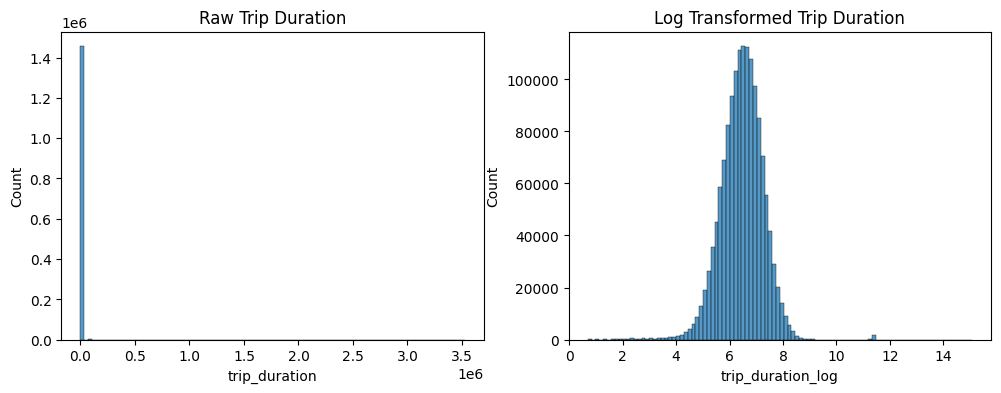

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for np.log1p

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df["trip_duration"], bins=100)
plt.title("Raw Trip Duration")

# Ensure 'trip_duration_log' exists before plotting
# This line was missing when the error occurred previously.
df["trip_duration_log"] = np.log1p(df["trip_duration"])

plt.subplot(1,2,2)
sns.histplot(df["trip_duration_log"], bins=100)
plt.title("Log Transformed Trip Duration")

plt.show()


In [99]:
import folium


map_center = [40.758896, -73.985130]
map_nyc = folium.Map(location=map_center, zoom_start=12)

df_for_map = pd.read_csv(f"{path}/NYC.csv")

for _, row in df_for_map.head(1000).iterrows():
    folium.Marker([row['pickup_latitude'], row['pickup_longitude']]).add_to(map_nyc)

map_nyc

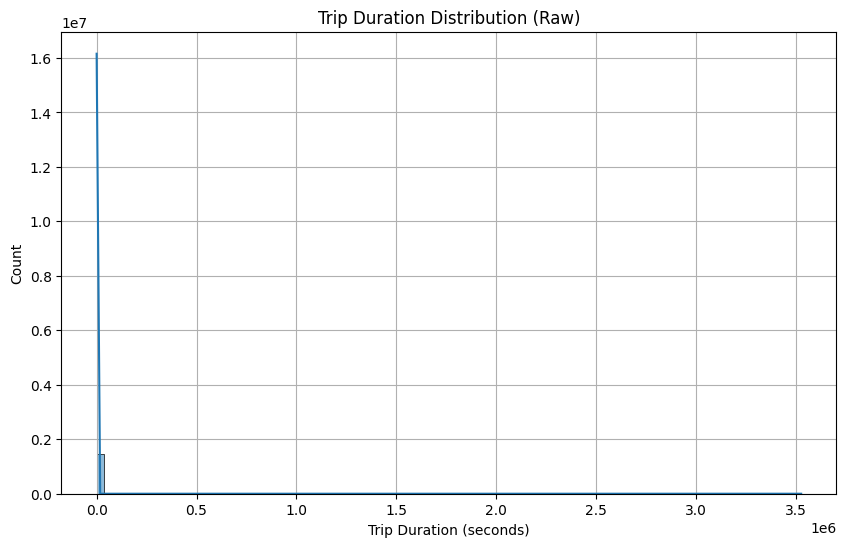

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["trip_duration"], bins=100, kde=True)
plt.title("Trip Duration Distribution (Raw)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [101]:
Q1 = df["trip_duration"].quantile(0.25)
Q3 = df["trip_duration"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[
    (df["trip_duration"] >= lower) &
    (df["trip_duration"] <= upper)
]


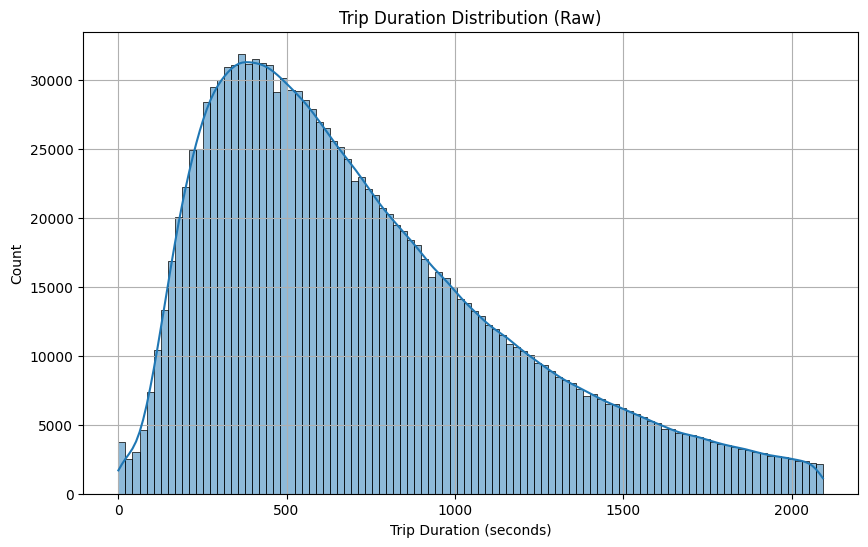

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["trip_duration"], bins=100, kde=True)
plt.title("Trip Duration Distribution (Raw)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

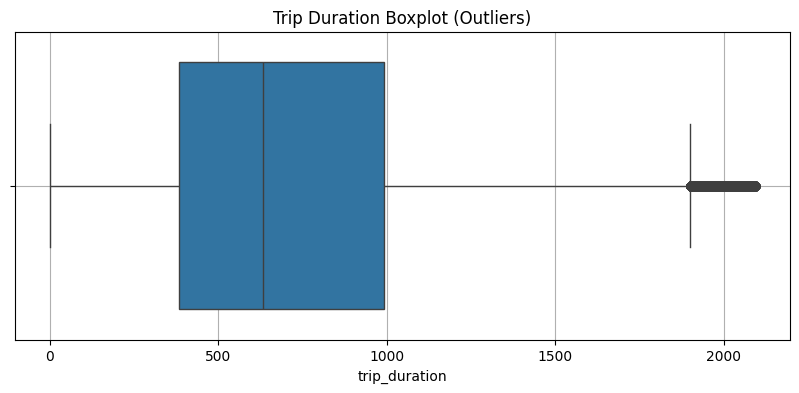

In [103]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["trip_duration"])
plt.title("Trip Duration Boxplot (Outliers)")
plt.grid(True)
plt.show()


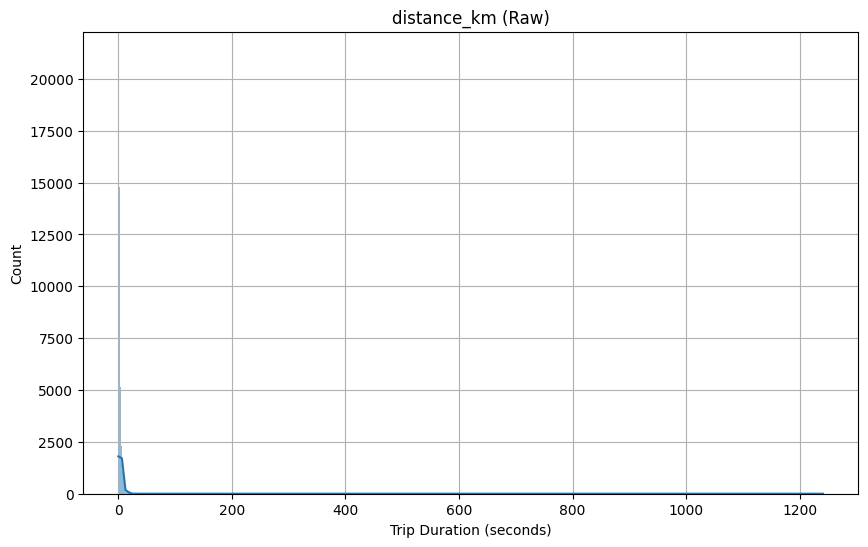

In [104]:
plt.figure(figsize=(10,6))
sns.histplot(df["distance_km"], kde=True)
plt.title("distance_km (Raw)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [105]:
Q1 = df["distance_km"].quantile(0.25)
Q3 = df["distance_km"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[
    (df["distance_km"] >= lower) &
    (df["distance_km"] <= upper)
]



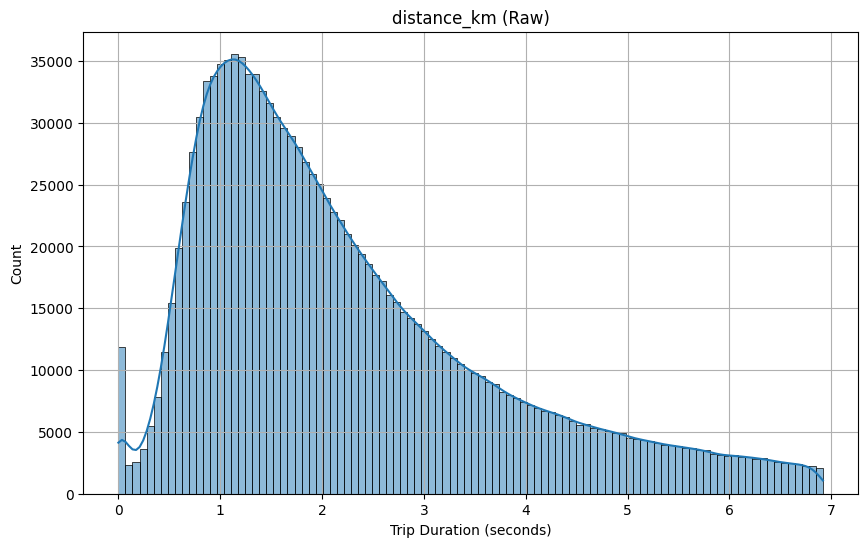

In [106]:
plt.figure(figsize=(10,6))
sns.histplot(df["distance_km"], bins=100, kde=True)
plt.title("distance_km (Raw)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [107]:
df["distance_km"].describe()


,distance_km
count,1.276732e+06
mean,2.249289e+00
std,1.477317e+00
min,0.000000e+00
25%,1.145916e+00
50%,1.847543e+00
75%,2.993385e+00
max,6.917873e+00


In [108]:
df["speed_kmh"] = df["distance_km"] / (df["trip_duration"] / 3600)

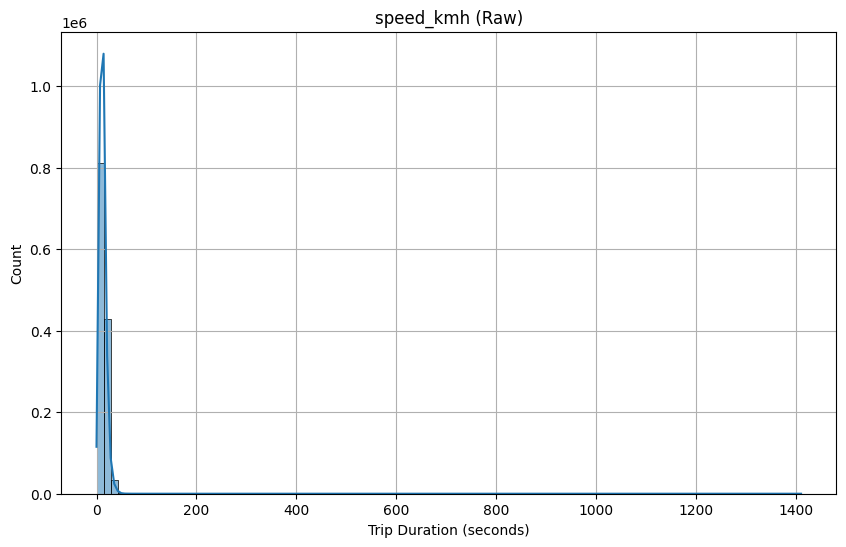

In [109]:
plt.figure(figsize=(10,6))
sns.histplot(df["speed_kmh"], bins=100, kde=True)
plt.title("speed_kmh (Raw)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [110]:
df = df[
    (df["speed_kmh"] >= 1) &
    (df["speed_kmh"] <= 80)
]


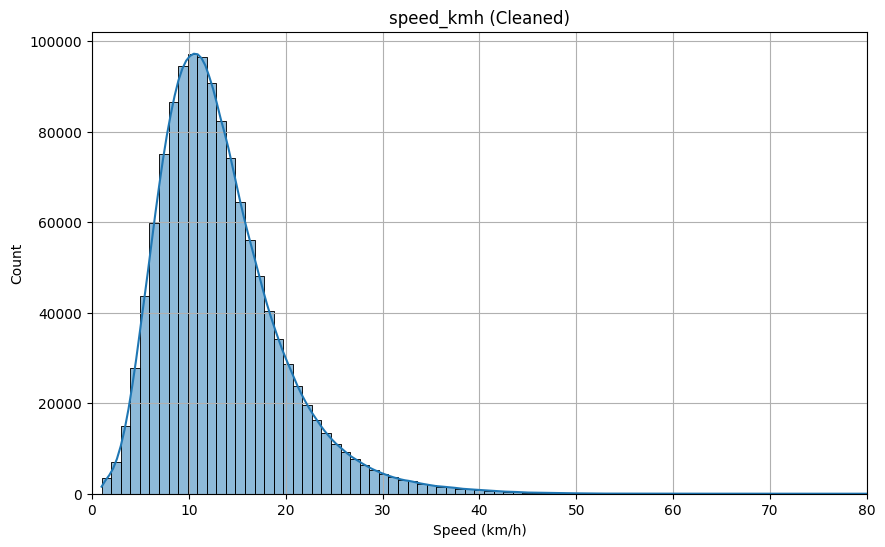

In [111]:
plt.figure(figsize=(10,6))
sns.histplot(df["speed_kmh"], bins=80, kde=True)
plt.xlim(0, 80)
plt.title("speed_kmh (Cleaned)")
plt.xlabel("Speed (km/h)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [112]:
df["trip_duration_log"] = np.log1p(df["trip_duration"])
df.drop(columns=["trip_duration"], inplace=True)

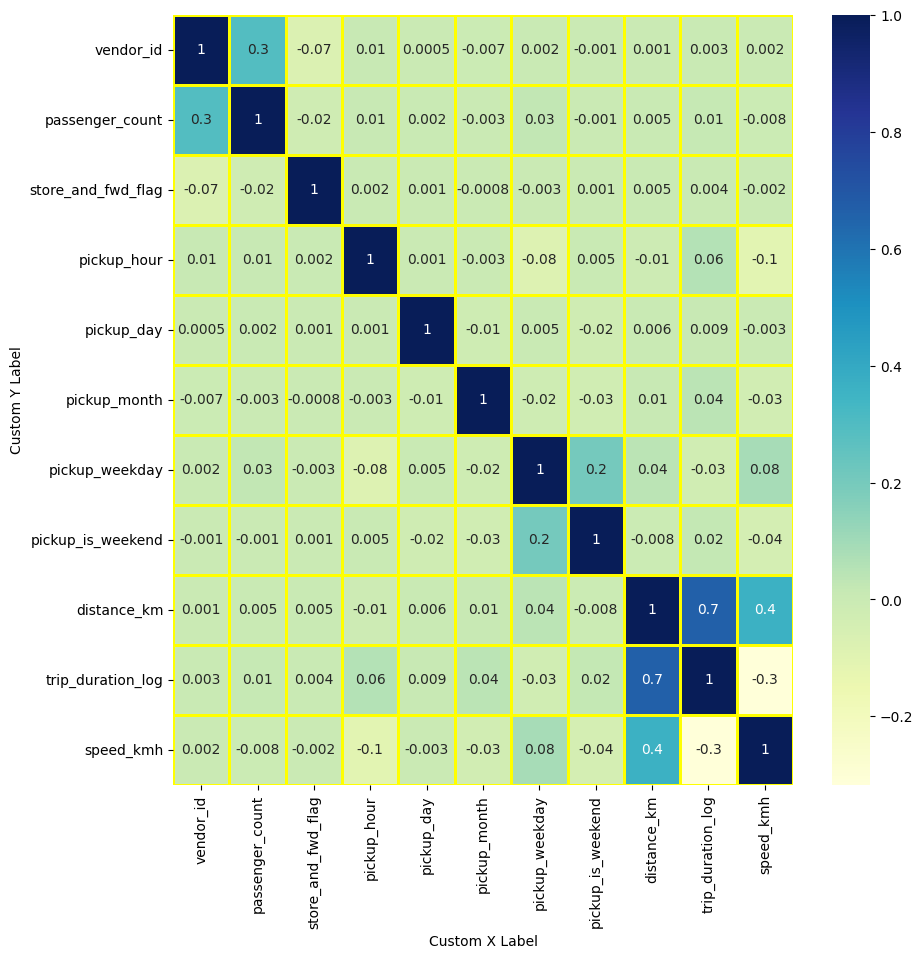

In [113]:
df.drop(columns=['dropoff_datetime'], inplace=True)

annot = True

linewidths = 1
linecolor = "yellow"

plt.figure(figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=annot, fmt="0.1g", cmap="YlGnBu",linewidths=linewidths,
                linecolor=linecolor)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
ax.set_xlabel("Custom X Label")
ax.set_ylabel("Custom Y Label")
plt.show()

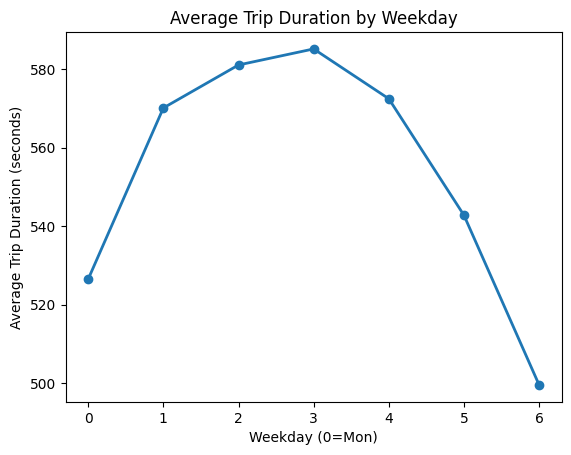

In [114]:
df_weekday = (
    df
    .groupby("pickup_weekday")["trip_duration_log"]
    .mean()
)
df_weekday_seconds = np.expm1(df_weekday)
df_weekday_seconds.plot(
    kind="line",
    marker="o",
    linewidth=2
)
plt.title("Average Trip Duration by Weekday")
plt.xlabel("Weekday (0=Mon)")
plt.ylabel("Average Trip Duration (seconds)")
plt.show()

In [115]:
df.describe()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_hour,pickup_day,pickup_month,pickup_weekday,pickup_is_weekend,distance_km,trip_duration_log,speed_kmh
count,1.266021e+06,1.266021e+06,1.266021e+06,1.266021e+06,1.266021e+06,1.266021e+06,1.266021e+06,1.266021e+06,1.266021e+06,1.266021e+06,1.266021e+06
mean,1.532730e+00,1.659830e+00,4.741628e-03,1.367700e+01,1.548509e+01,3.502940e+00,3.053798e+00,1.533671e-01,2.267982e+00,6.319727e+00,1.323398e+01
std,4.989278e-01,1.312107e+00,6.869606e-02,6.326318e+00,8.704501e+00,1.679997e+00,1.950797e+00,3.603412e-01,1.469323e+00,6.663764e-01,6.299805e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.241750e-04,6.931472e-01,1.000491e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,9.000000e+00,8.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.161489e+00,5.910797e+00,8.874696e+00
50%,2.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,1.500000e+01,3.000000e+00,3.000000e+00,0.000000e+00,1.861526e+00,6.383507e+00,1.213762e+01
75%,2.000000e+00,2.000000e+00,0.000000e+00,1.900000e+01,2.300000e+01,5.000000e+00,5.000000e+00,0.000000e+00,3.007393e+00,6.799056e+00,1.633177e+01
max,2.000000e+00,6.000000e+00,1.000000e+00,2.300000e+01,3.100000e+01,6.000000e+00,6.000000e+00,1.000000e+00,6.917873e+00,7.646354e+00,7.994522e+01


In [116]:
df.isna().sum()


,0
vendor_id,0
passenger_count,0
store_and_fwd_flag,0
pickup_hour,0
pickup_day,0
pickup_month,0
pickup_weekday,0
pickup_is_weekend,0
distance_km,0
trip_duration_log,0


In [117]:
from sklearn.model_selection import train_test_split
features = ['passenger_count', 'pickup_hour', 'pickup_day',
            'pickup_weekday', 'pickup_is_weekend', 'distance_km']
X = df[features]
y = df['trip_duration_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

In [119]:
!pip install catboost


In [120]:
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [121]:
models = {
     "XGBoost": XGBRegressor(xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror",
    verbosity=0
)
),
}
errors=[]
for model_name , model in models.items():
    model.fit(X_train,y_train)
    MAE_Train = mean_absolute_error(y_train,model.predict(X_train))
    MAE_Test  =  mean_absolute_error(y_test,model.predict(X_test))
    MSE_Train = mean_squared_error(y_train,model.predict(X_train))
    MSE_Test  =  mean_squared_error(y_test,model.predict(X_test))
    RMSE_Train = root_mean_squared_error(y_train,model.predict(X_train))
    RMSE_Test  =  root_mean_squared_error(y_test,model.predict(X_test))
    R_Train = r2_score(y_train,model.predict(X_train))
    R_Test  =  r2_score(y_test,model.predict(X_test))
    errors.append([MAE_Train,MSE_Train,RMSE_Train,R_Train,MAE_Test,MSE_Test,RMSE_Test,R_Test])

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:46:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "xgb_model" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [122]:
pd.DataFrame(errors,columns=["MAE_Train","MSE_Train","RMSE_Train","R_Train","MAE_Test","MSE_Test","RMSE_Test","R_Test"],index=models.keys())

,MAE_Train,MSE_Train,RMSE_Train,R_Train,MAE_Test,MSE_Test,RMSE_Test,R_Test
XGBoost,0.301965,0.156769,0.39594,0.646963,0.303978,0.159449,0.399311,0.640919


In [123]:
df

,vendor_id,passenger_count,store_and_fwd_flag,pickup_hour,pickup_day,pickup_month,pickup_weekday,pickup_is_weekend,distance_km,trip_duration_log,speed_kmh
0,2,1,0,17,14,3,0,0,1.498521,6.122493,11.856428
1,1,1,0,0,12,6,6,0,1.805507,6.498282,9.803659
3,2,1,0,19,6,4,2,0,1.485498,6.063785,12.465721
4,2,1,0,13,26,3,5,0,1.188588,6.077642,9.836594
5,2,6,0,22,30,1,5,0,1.098942,6.095825,8.930458
...,...,...,...,...,...,...,...,...,...,...,...
1458638,2,5,0,0,2,2,1,0,2.317448,6.028279,20.151725
1458639,2,4,0,13,8,4,4,1,1.225080,6.658011,5.668751
1458640,1,1,0,7,10,1,6,0,6.049836,6.486161,33.251005
1458642,1,1,0,15,5,1,1,0,1.092564,5.924256,10.544853


In [132]:
import gradio as gr
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

APP_TITLE = "🚕 NYC Taxi Trip Duration Predictor"

# =========================
# Train Model on YOUR FULL DATA
# =========================
def train_xgboost_model(df):
    """
    تدريب XGBoost على الـ DataFrame بتاعك كله (1.25 مليون row)

    Required columns in df:
    - passenger_count
    - pickup_hour
    - pickup_weekday
    - pickup_is_weekend
    - pickup_month
    - distance_km
    - trip_duration (OR log_trip_duration)
    """

    print("="*70)
    print("🚀 Starting XGBoost Training on YOUR FULL DATASET")
    print("="*70)

    # Check required columns
    feature_cols = ['passenger_count', 'pickup_hour', 'pickup_weekday',
                    'pickup_is_weekend', 'pickup_month', 'distance_km']

    missing_features = [col for col in feature_cols if col not in df.columns]
    if missing_features:
        raise ValueError(f"❌ Missing feature columns: {missing_features}")

    # Check target column (support multiple names)
    target_col = None
    possible_targets = ['log_trip_duration', 'trip_duration_log', 'trip_duration']

    for col in possible_targets:
        if col in df.columns:
            target_col = col
            print(f"✅ Found target column: '{col}'")
            break

    if target_col is None:
        print(f"\n❌ ERROR: Missing target column!")
        print(f"   Available columns: {list(df.columns)}")
        print(f"\n💡 Please check your column name for trip duration.")
        raise ValueError(
            "❌ Missing target column!\n"
            f"   Your columns: {list(df.columns)}"
        )

    # If trip_duration (not logged), create log version
    if target_col == 'trip_duration':
        print("⚙️ Creating log transform from 'trip_duration'...")
        df = df.copy()
        df['log_trip_duration'] = np.log1p(df['trip_duration'])
        target_col = 'log_trip_duration'
        print("✅ log_trip_duration created!")

    # Rename if needed
    if target_col == 'trip_duration_log':
        print("⚙️ Using 'trip_duration_log' as target")
        df = df.copy()
        df['log_trip_duration'] = df['trip_duration_log']
        target_col = 'log_trip_duration'

    print(f"\n📊 Dataset Info:")
    print(f"   Total Rows: {len(df):,}")
    print(f"   Total Columns: {len(df.columns)}")
    print(f"   Available Columns: {list(df.columns)}")
    print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Features and Target
    features = ['passenger_count', 'pickup_hour', 'pickup_weekday',
                'pickup_is_weekend', 'pickup_month', 'distance_km']

    X = df[features].copy()
    y = df['log_trip_duration'].copy()

    print(f"\n📐 Features: {features}")
    print(f"   X shape: {X.shape}")
    print(f"   y shape: {y.shape}")

    # Train/Test Split
    print(f"\n🔀 Splitting data (80% train, 20% test)...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"   Train: {len(X_train):,} samples")
    print(f"   Test:  {len(X_test):,} samples")

    # XGBoost Model (same as your parameters)
    print(f"\n🤖 Training XGBoost Model...")
    print(f"   Parameters:")
    print(f"   - n_estimators: 500")
    print(f"   - learning_rate: 0.05")
    print(f"   - max_depth: 10")
    print(f"   - subsample: 0.8")
    print(f"   - colsample_bytree: 0.8")

    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective='reg:squarederror',
        verbosity=1,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    print(f"\n✅ Model Training Completed!")

    # Calculate ALL Metrics
    print(f"\n📊 Calculating Performance Metrics...")
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    MAE_Train = mean_absolute_error(y_train, y_train_pred)
    MAE_Test = mean_absolute_error(y_test, y_test_pred)

    MSE_Train = mean_squared_error(y_train, y_train_pred)
    MSE_Test = mean_squared_error(y_test, y_test_pred)

    RMSE_Train = np.sqrt(MSE_Train)
    RMSE_Test = np.sqrt(MSE_Test)

    R_Train = r2_score(y_train, y_train_pred)
    R_Test = r2_score(y_test, y_test_pred)

    # Store metrics
    metrics = {
        'MAE_Train': MAE_Train,
        'MSE_Train': MSE_Train,
        'RMSE_Train': RMSE_Train,
        'R_Train': R_Train,
        'MAE_Test': MAE_Test,
        'MSE_Test': MSE_Test,
        'RMSE_Test': RMSE_Test,
        'R_Test': R_Test
    }

    model.metrics = metrics

    # Print Results
    print(f"\n{'='*70}")
    print(f"📈 MODEL PERFORMANCE METRICS")
    print(f"{'='*70}")
    print(f"{'Metric':<15} {'Train':<25} {'Test':<25}")
    print(f"{'-'*70}")
    print(f"{'MAE':<15} {MAE_Train:<25.6f} {MAE_Test:<25.6f}")
    print(f"{'MSE':<15} {MSE_Train:<25.6f} {MSE_Test:<25.6f}")
    print(f"{'RMSE':<15} {RMSE_Train:<25.6f} {RMSE_Test:<25.6f}")
    print(f"{'R²':<15} {R_Train:<25.6f} {R_Test:<25.6f}")
    print(f"{'='*70}\n")

    return model


# =========================
# Initialize Model with YOUR df
# =========================
print("\n🔍 Looking for your DataFrame 'df'...")

if 'df' not in globals():
    raise NameError(
        "❌ DataFrame 'df' not found!\n"
        "Please load your data first:\n"
        "   df = pd.read_csv('your_data.csv')\n"
        "Then run this code."
    )

print(f"✅ Found df with shape: {df.shape}")

# Train the model on YOUR FULL DATA
model = train_xgboost_model(df)

# Save model
try:
    with open('xgb_taxi_real.pkl', 'wb') as f:
        pickle.dump(model, f)
    print("💾 Model saved to: xgb_taxi_real.pkl\n")
except Exception as e:
    print(f"⚠️ Could not save model: {e}\n")


# =========================
# Prediction Function
# =========================
def predict_trip_duration(
    passenger_count,
    pickup_hour,
    pickup_weekday,
    pickup_is_weekend,
    pickup_month,
    distance_km
):
    try:
        df_input = pd.DataFrame([{
            "passenger_count": int(passenger_count),
            "pickup_hour": int(pickup_hour),
            "pickup_weekday": int(pickup_weekday),
            "pickup_is_weekend": int(pickup_is_weekend),
            "pickup_month": int(pickup_month),
            "distance_km": float(distance_km),
        }])

        pred_log = model.predict(df_input)
        pred_seconds = float(np.expm1(pred_log)[0])
        pred_minutes = pred_seconds / 60

        result_text = (
            f"## 🚕 Predicted Trip Duration\n\n"
            f"### ⏱️ {pred_minutes:.1f} minutes\n"
            f"**({pred_seconds:.0f} seconds)**\n\n"
        )

        if pred_minutes < 5:
            result_text += "⚡ **Very short trip**"
        elif pred_minutes < 15:
            result_text += "🚗 **Short trip**"
        elif pred_minutes < 30:
            result_text += "🚙 **Medium trip**"
        else:
            result_text += "🚌 **Long trip**"

        return result_text, df_input

    except Exception as e:
        return f"❌ Prediction failed: {str(e)}", pd.DataFrame()


# =========================
# Gradio Interface
# =========================
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown(f"# {APP_TITLE}")
    gr.Markdown(f"**Trained on {len(df):,} real NYC taxi trips using XGBoost**")

    with gr.Row():
        with gr.Column():
            passenger_count = gr.Number(
                label="👥 Passenger Count",
                value=1,
                minimum=1,
                maximum=6
            )
            pickup_hour = gr.Slider(
                0, 23,
                step=1,
                label="🕐 Pickup Hour (0-23)",
                value=14
            )
            pickup_weekday = gr.Slider(
                0, 6,
                step=1,
                label="📅 Weekday (0=Mon, 6=Sun)",
                value=2
            )

        with gr.Column():
            pickup_is_weekend = gr.Radio(
                choices=[("Weekday", 0), ("Weekend", 1)],
                label="🎉 Weekend?",
                value=0
            )
            pickup_month = gr.Slider(
                1, 12,
                step=1,
                label="📆 Month (1-12)",
                value=6
            )
            distance_km = gr.Number(
                label="📏 Distance (km)",
                value=5.0,
                minimum=0.1
            )

    predict_btn = gr.Button("🔮 Predict Trip Duration", variant="primary", size="lg")

    output_text = gr.Markdown()

    with gr.Accordion("📊 Input Features", open=False):
        output_df = gr.Dataframe(label="Features Used")

    with gr.Accordion("📈 Model Performance Metrics", open=True):
        if hasattr(model, 'metrics'):
            metrics_df = pd.DataFrame([model.metrics])
            metrics_df = metrics_df.round(6)
            gr.Dataframe(
                value=metrics_df,
                label="Training & Testing Metrics (MAE | MSE | RMSE | R²)"
            )

    gr.Examples(
        examples=[
            [1, 8, 1, 0, 3, 3.5],    # Morning rush
            [2, 18, 4, 0, 6, 8.2],   # Evening rush
            [4, 23, 5, 1, 12, 2.1],  # Late night weekend
            [1, 14, 2, 0, 9, 15.5],  # Long afternoon trip
        ],
        inputs=[passenger_count, pickup_hour, pickup_weekday,
                pickup_is_weekend, pickup_month, distance_km],
        label="💡 Try These Examples"
    )

    predict_btn.click(
        fn=predict_trip_duration,
        inputs=[passenger_count, pickup_hour, pickup_weekday,
                pickup_is_weekend, pickup_month, distance_km],
        outputs=[output_text, output_df]
    )

if __name__ == "__main__":
    demo.launch()


🔍 Looking for your DataFrame 'df'...
✅ Found df with shape: (1266021, 11)
🚀 Starting XGBoost Training on YOUR FULL DATASET
✅ Found target column: 'trip_duration_log'
⚙️ Using 'trip_duration_log' as target

📊 Dataset Info:
   Total Rows: 1,266,021
   Total Columns: 12
   Available Columns: ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_weekday', 'pickup_is_weekend', 'distance_km', 'trip_duration_log', 'speed_kmh', 'log_trip_duration']
   Memory Usage: 106.25 MB

📐 Features: ['passenger_count', 'pickup_hour', 'pickup_weekday', 'pickup_is_weekend', 'pickup_month', 'distance_km']
   X shape: (1266021, 6)
   y shape: (1266021,)

🔀 Splitting data (80% train, 20% test)...
   Train: 1,012,816 samples
   Test:  253,205 samples

🤖 Training XGBoost Model...
   Parameters:
   - n_estimators: 500
   - learning_rate: 0.05
   - max_depth: 10
   - subsample: 0.8
   - colsample_bytree: 0.8

✅ Model Training Completed!

📊 Calculating Performa

/tmp/ipython-input-4128034706.py:247: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b7f4289ad53cb47646.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
